# Análise de Pacientes com Doença de Graves

## Introdução
Este projeto é parte de um Trabalho de Conclusão de Curso (TCC) do curso de Medicina da Universidade Federal do Piauí, sob autoria de Claudia Roque e orientação do Dr. Rogério Santiago. O objetivo é analisar dados de pacientes com Doença de Graves, com foco em dados demográficos, laboratoriais, clínicos e tratamentos, em dois momentos de avaliação (primeira e segunda medições). Esta documentação detalha os passos iniciais da análise exploratória e tratamento de dados.

## Estrutura Inicial dos Dados
Os dados foram organizados em quatro categorias principais:
- **Dados do Paciente**: Informações demográficas e antropométricas (ex.: `Paciente`, `Sexo`, `Data de Nascimento`, `Altura (cm)`).
- **Dados de Exames**: Resultados laboratoriais e de imagem (ex.: `TSH1`, `T4L1`, `TSH2`, `T4L2`).
- **Dados Clínicos**: Sinais e sintomas (ex.: `Exoftalmia1`, `Exoftalmia2`).
- **Tipos de Tratamento**: Modalidades terapêuticas (ex.: `Tionamidas1`, `RIT2`).

### Dados do Paciente
Iniciamos a análise com os dados demográficos:
- Colunas iniciais: `Paciente`, `Sexo`, `Data de Nascimento`, `Altura (cm)`, `Data1`.
- Colunas calculadas:
  - `Idade_dias`, `Idade_meses`, `Idade_anos`: Idade do paciente em dias, meses e anos, calculada com base na data atual (10/04/2025) e `Data de Nascimento`.
  - `medicao1_dias`, `medicao1_meses`, `medicao1_anos`: Tempo decorrido desde a primeira medição (`Data1`) até a data atual.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
document = r"C:\Users\Markos Alves\Downloads\Coleta De Dados.xlsx".replace("\\","/")

In [9]:
arq = pd.read_excel(document)

# Analisando dados do paciente

In [11]:
arq['Data de nascimento'] = arq['Data de nascimento'].astype(str)
arq['Data de nascimento'] = arq['Data de nascimento'].replace("?", "")
arq['Data de nascimento'] = arq['Data de nascimento'].replace("nan", "")

In [13]:
dados_paciente = arq[['Paciente', 'Sexo', 'Data de nascimento', 'Altura (cm)', 'Data1']]

In [16]:
dados_paciente['Sexo'] = dados_paciente['Sexo'].str.strip()
dados_paciente['Sexo'] = dados_paciente['Sexo'].str.upper()

In [17]:
dados_paciente['Data de nascimento'] = pd.to_datetime(dados_paciente['Data de nascimento'])
dados_paciente['Data de nascimento'] = dados_paciente['Data de nascimento'].dt.strftime('%d/%m/%Y')
dados_paciente['Data de nascimento'] = pd.to_datetime(dados_paciente['Data de nascimento'], format='%d/%m/%Y')

dados_paciente['Data1'] = pd.to_datetime(dados_paciente['Data1'], dayfirst=True)
dados_paciente['Data1'] = dados_paciente['Data1'].dt.strftime('%d/%m/%Y')
dados_paciente['Data1'] = pd.to_datetime(dados_paciente['Data1'], format='%d/%m/%Y')

# Criação das colunas auxiliares para auxiliar nos cauculos e analises
hoje = pd.to_datetime(datetime.today().date())
dados_paciente['Idade_dias'] = (hoje - dados_paciente['Data de nascimento']).dt.days
dados_paciente['Idade_anos'] = dados_paciente['Idade_dias'] // 365
dados_paciente['Idade_meses'] = dados_paciente['Idade_dias'] // 30

dados_paciente['medicao1_dias'] = (hoje - dados_paciente['Data1']).dt.days
dados_paciente['medicao1_ano'] = dados_paciente['medicao1_dias'] // 365
dados_paciente['medicao1_meses'] = dados_paciente['medicao1_dias'] // 30

In [18]:
dados_paciente.head(5)

,Paciente,Sexo,Data de nascimento,Altura (cm),Data1,Idade_dias,Idade_anos,Idade_meses,medicao1_dias,medicao1_ano,medicao1_meses
0,Andre Glebio,M,1989-01-30,178,2012-07-10,13219.0,36.0,440.0,4657,12,155
1,Ana Rogeria,F,NaT,164,2021-02-01,NaN,NaN,NaN,1529,4,50
2,Alice Caroline,F,1994-09-02,148,2008-03-17,11178.0,30.0,372.0,6233,17,207
3,Albaniza,F,1952-02-25,163,2017-06-06,26708.0,73.0,890.0,2865,7,95
4,Adriano Gomes,M,1974-01-09,168,2008-01-22,18719.0,51.0,623.0,6288,17,209


## 1 Análise Exploratória Inicial - Coluna `Altura (cm)`

In [40]:
dados_paciente['Altura (cm)'].unique()

array([178. , 164. , 148. , 163. , 168. , 170. , 155. , 173. , 167.5,
       179. , 158. , 162. , 154. , 156. , 165. , 137. , 167. , 171. ,
       157. , 172. , 159. , 150. , 145. , 151. ])

### Identificação de Outliers
Usando o critério do intervalo interquartil (IQR):
- Q1: 156 cm (aproximado)
- Q3: 167 cm (aproximado)
- IQR: 11 cm
- Limite inferior: 139.5 cm
- Limite superior: 183.5 cm
- **Outlier**: 137 cm (abaixo do limite inferior). Valores como 179 cm estão dentro do limite superior.

In [20]:
# Primeiro, verificamos o tipo original da coluna
print(dados_paciente['Altura (cm)'].dtype)

# Tenta converter para numérico (coercion transforma strings inválidas em NaN)
dados_paciente['Altura (cm)'] = pd.to_numeric(dados_paciente['Altura (cm)'], errors='coerce')

object


## 1.2 Verificar volume de linhas erradas ou faltantes

In [21]:
# Contar valores faltantes (NaN) após conversão
faltantes = dados_paciente['Altura (cm)'].isna().sum()
total = len(dados_paciente)
print(f"Valores faltantes ou inválidos: {faltantes} de {total} linhas")

Valores faltantes ou inválidos: 5 de 45 linhas


### Identificação de Dados Faltantes
Observamos um baixo número de dados faltantes ou inadequados na coluna `Altura (cm)`:
- **Proporção**: 5/45 (11%) dos valores eram inadequados.
- **Valores Identificados**: `'?'` (string) e `nan` (valor ausente) foram encontrados nos valores únicos, representando 2 dos 5 casos.
- **Comentário**: A proporção de dados faltantes (11%) é relativamente baixa, o que minimiza o impacto de tratamentos como imputação ou exclusão. Isso nos permite prosseguir com a análise exploratória com confiança, desde que os valores inadequados sejam tratados adequadamente.

- Total de pacientes: 45.
- Estatísticas gerais (excluindo valores inadequados):
  - Média: 159.39 cm
  - Mediana: 158.00 cm
  - Moda: 156.00 cm (6 ocorrências)
  - Desvio Padrão: 8.57 cm

## 1.3 Estatísticas dos dados válidos

In [34]:
# Filtrar apenas valores válidos
alturas_validas = dados_paciente.dropna(subset=['Altura (cm)'])

# Agrupar por sexo e calcular média, mediana e desvio padrão
estatisticas = alturas_validas.groupby('Sexo')['Altura (cm)'].agg(
    Média='mean',
    Mediana='median',
    Desvio_Padrão='std'
).round(2)

# Calcular moda e frequência da moda separadamente
moda_dict = {}
moda_freq_dict = {}

for sexo, grupo in alturas_validas.groupby('Sexo'):
    moda_val = grupo['Altura (cm)'].mode()[0]
    freq = grupo['Altura (cm)'].value_counts()[moda_val]
    moda_dict[sexo] = moda_val
    moda_freq_dict[sexo] = freq

# Adicionar as colunas de moda e sua frequência
estatisticas['Moda'] = pd.Series(moda_dict)
estatisticas['Moda_Frequência'] = pd.Series(moda_freq_dict)

# Organizar a ordem das colunas
estatisticas = estatisticas[['Média', 'Mediana', 'Moda', 'Moda_Frequência', 'Desvio_Padrão']]

# Exibir
display(estatisticas)

,Média,Mediana,Moda,Moda_Frequência,Desvio_Padrão
Sexo,,,,,
F,157.10,156.0,156.0,6,6.81
M,172.33,172.0,165.0,1,5.50


### Distribuição por Sexo
Para refinar a análise, calculamos estatísticas separadas por sexo:
- **Mulheres (F)**:
  - Média: 157.10 cm
  - Mediana: 156.0 cm
  - Moda: 156.0 cm (6 ocorrências)
  - Desvio Padrão: 6.81 cm
- **Homens (M)**:
  - Média: 172.33 cm
  - Mediana: 172.0 cm
  - Moda: 165.0 cm (1 ocorrência)
  - Desvio Padrão: 5.50 cm

A diferença entre as médias (157.10 cm para mulheres e 172.33 cm para homens) é consistente com as médias populacionais brasileiras, indicando que a amostra é representativa.

In [36]:
dados_paciente.loc[(dados_paciente['Sexo'] == 'M') & (dados_paciente['Altura (cm)'].isna()), 'Altura (cm)'] = 172.0
dados_paciente.loc[(dados_paciente['Sexo'] == 'F') & (dados_paciente['Altura (cm)'].isna()), 'Altura (cm)'] = 156.0

### Tratamento dos Valores Inadequados
Decidimos tratar os 5 valores inadequados (incluindo `'?'`, `nan` e possivelmente 137 cm) com imputação baseada no sexo:
- Para mulheres: Substituir por 156.0 cm (mediana feminina).
- Para homens: Substituir por 172.0 cm (mediana masculina).
- **Justificativa**: A imputação por sexo é mais realista clinicamente, já que homens e mulheres têm alturas médias diferentes. A mediana foi escolhida por ser robusta a outliers.

### Escalas e Normalização
- A coluna `Altura (cm)` está em uma escala linear e não requer normalização para análises iniciais, já que a distribuição é aproximadamente normal.
- As colunas `Idade_dias` e `medicao1_dias` podem estar em escalas grandes (ex.: 10.000 dias), mas `Idade_anos` e `medicao1_anos` são mais práticas e serão usadas nas análises principais.

## 1.4 Distribuição (visual)

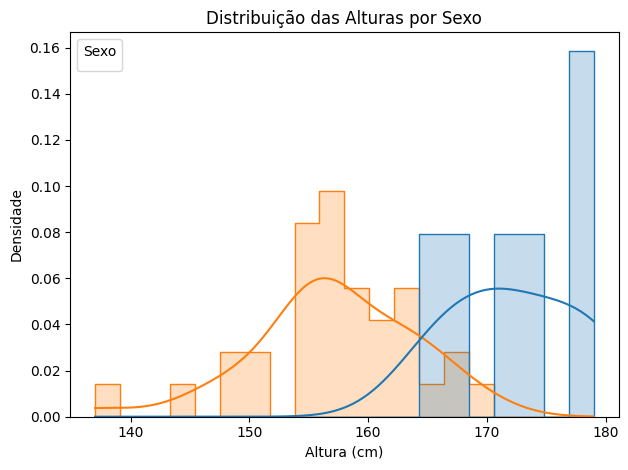

In [49]:
# Gráfico único com separação por cor (sexo)
sns.histplot(data=alturas_validas, x='Altura (cm)', hue='Sexo', bins=20, kde=True, element='step', stat='density', common_norm=False)

plt.title('Distribuição das Alturas por Sexo')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

## 2 Análise Exploratória Inicial - Coluna `Sexo`

In [41]:
dados_paciente['Sexo'].value_counts()

Sexo
F    38
M     7
Name: count, dtype: int64

## Análise Exploratória da Variável `Sexo` (Atualização com Contagem Real)

### Distribuição de `Sexo`
A variável `Sexo` é categórica, com valores "M" (masculino) e "F" (feminino). A contagem real foi obtida com `dados_paciente['Sexo'].value_counts()`:

- **Frequência Absoluta**:
  - Mulheres (F): 38 pacientes
  - Homens (M): 7 pacientes
- **Frequência Relativa**:
  - Mulheres: 38/45 ≈ 84.4%
  - Homens: 7/45 ≈ 15.6%

### Visualização
- Um gráfico de barras mostraria uma predominância significativa de mulheres (38) sobre homens (7), com uma proporção de aproximadamente 5:1.
- Um gráfico de pizza destacaria a distribuição relativa: 84.4% para mulheres e 15.6% para homens.

### Interpretação
- A proporção de 84.4% mulheres e 15.6% homens está alinhada com a epidemiologia da Doença de Graves, que apresenta maior prevalência em mulheres (razão típica de 5:1 a 10:1). Isso confirma que a amostra é representativa da população-alvo.
- **Implicação**: O desequilíbrio de gênero é esperado, mas o número reduzido de homens (apenas 7) pode limitar a potência estatística para análises específicas nesse grupo. Testes não paramétricos (ex.: Mann-Whitney) ou ajustes estatísticos podem ser necessários ao comparar homens e mulheres.
- **Revisão da Análise de Altura**: A predominância de mulheres (84.4%) explica por que a média geral de altura (159.39 cm) está mais próxima da média feminina (157.10 cm) do que da masculina (172.33 cm).

## 2.1 Distribuição (visual)

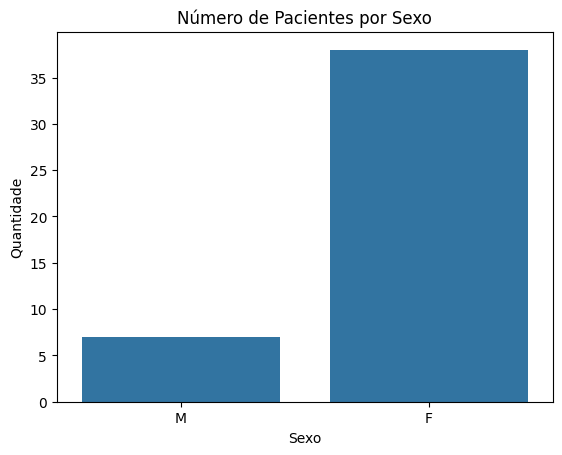

In [42]:
sns.countplot(data=dados_paciente, x='Sexo')
plt.title('Número de Pacientes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

## 3 Análise Exploratória Inicial - Coluna `Idade_dias, Idade_anos, idade_meses`

### Dados Iniciais
As idades dos 45 pacientes foram fornecidas em três formatos:
- `Idade_dias`: Idade em dias.
- `Idade_meses`: Idade em meses.
- `Idade_anos`: Idade em anos.

In [44]:
print(list(dados_paciente['Idade_dias']))
print()
print(list(dados_paciente['Idade_meses']))
print()
print(list(dados_paciente['Idade_anos']))

[13219.    nan 11178. 26708. 18719. 21765. 24413. 17123. 17509. 11834.
 21980. 17202. 23229. 14619. 22470. 17481. 15295. 19291. 20122. 20441.
 16109. 20146. 18136. 23421. 30251. 23240. 13972. 19292. 12433. 13932.]

[ 440.   nan  372.  890.  623.  725.  813.  570.  583.  394.  732.  573.
  774.  487.  749.  582.  509.  643.  670.  681.  536.  671.  604.  780.
 1008.  465.  414.  464.]

[36. nan 30. 73. 51. 59. 66. 46. 47. 32. 60. 63. 40. 61. 41. 52. 55. 56.
 44. 49. 64. 82. 38. 34.]


### Valores Ausentes
- Há 1 valor `nan` em cada coluna, correspondente ao mesmo paciente.
- **Proporção**: 1/45 (2.2%) de dados faltantes, o que é muito baixo e tem impacto mínimo na análise.

## 3.1 Distribuição (visual)

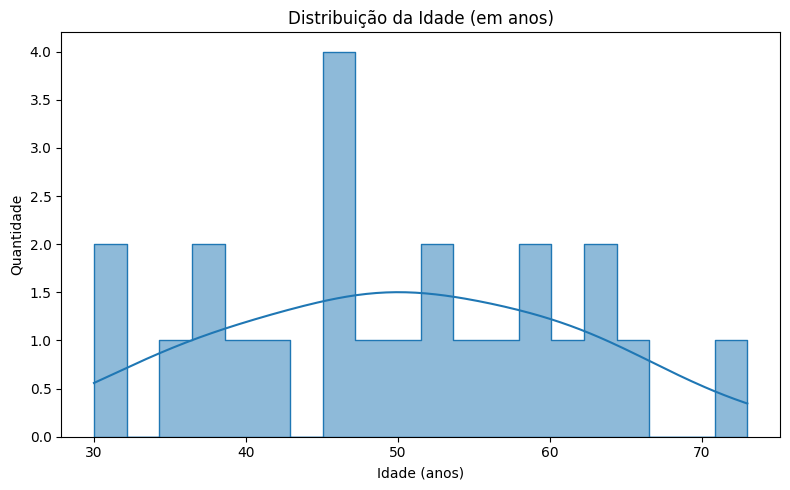

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=alturas_validas,
    x='Idade_anos',
    bins=20,
    kde=True,
    element='step',
    common_norm=False
)
plt.title('Distribuição da Idade (em anos)')
plt.xlabel('Idade (anos)')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

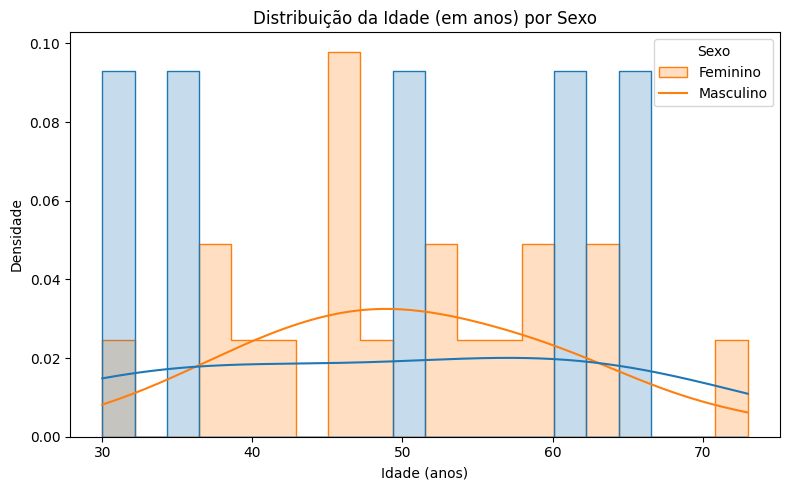

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=alturas_validas,
    x='Idade_anos',
    hue='Sexo',
    bins=20,
    kde=True,
    element='step',
    stat='density',
    common_norm=False
)
plt.title('Distribuição da Idade (em anos) por Sexo')
plt.xlabel('Idade (anos)')
plt.ylabel('Densidade')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])  # você pode trocar a ordem se quiser
plt.tight_layout()
plt.show()


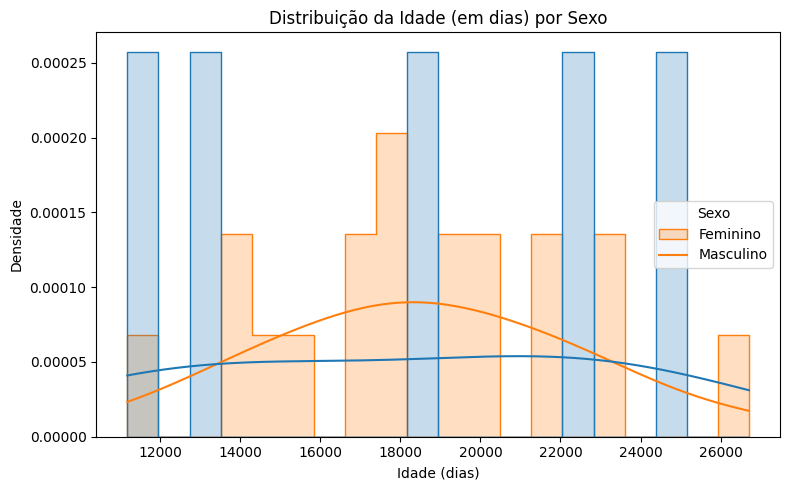

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=alturas_validas,
    x='Idade_dias',
    hue='Sexo',
    bins=20,
    kde=True,
    element='step',
    stat='density',
    common_norm=False
)
plt.title('Distribuição da Idade (em dias) por Sexo')
plt.xlabel('Idade (dias)')
plt.ylabel('Densidade')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
plt.tight_layout()
plt.show()


## 4 Análise Exploratória Inicial - Coluna `medicao1_dias, medicao1_meses, medicao1_anos`

### Dados Iniciais
O tempo decorrido desde a primeira medição (`Data1`) até a data atual (10/04/2025) foi calculado para os 45 pacientes e fornecido em três formatos:
- `medicao1_dias`: Tempo em dias desde a primeira medição.
- `medicao1_meses`: Tempo em meses desde a primeira medição.
- `medicao1_anos`: Tempo em anos desde a primeira medição.

In [60]:
print(list(dados_paciente['medicao1_dias']))
print()
print(list(dados_paciente['medicao1_meses']))
print()
print(list(dados_paciente['medicao1_ano']))

[4657, 1529, 6233, 2865, 6288, 3019, 2269, 937, 4739, 3618, 3526, 5039, 3738, 6117, 4098, 5384, 2033, 5589, 5259, 2410, 5323, 2241, 6141, 4368, 1382, 3026, 3335, 5542, 1812, 3531, 2016, 7608, 5314, 4100, 2745, 5903, 6547, 3132, 4979, 4875, 6137, 2698, 3545, 3311, 3926]

[155, 50, 207, 95, 209, 100, 75, 31, 157, 120, 117, 167, 124, 203, 136, 179, 67, 186, 175, 80, 177, 74, 204, 145, 46, 100, 111, 184, 60, 117, 67, 253, 177, 136, 91, 196, 218, 104, 165, 162, 204, 89, 118, 110, 130]

[12, 4, 17, 7, 17, 8, 6, 2, 12, 9, 9, 13, 10, 16, 11, 14, 5, 15, 14, 6, 14, 6, 16, 11, 3, 8, 9, 15, 4, 9, 5, 20, 14, 11, 7, 16, 17, 8, 13, 13, 16, 7, 9, 9, 10]


In [61]:
# Filtrar apenas valores válidos
tempos_medicao = dados_paciente.dropna(subset=['medicao1_ano'])

# Agrupar por sexo e calcular média, mediana e desvio padrão
estatisticas = alturas_validas.groupby('Sexo')['medicao1_ano'].agg(
    Média='mean',
    Mediana='median',
    Desvio_Padrão='std'
).round(2)

# Calcular moda e frequência da moda separadamente
moda_dict = {}
moda_freq_dict = {}

for sexo, grupo in alturas_validas.groupby('Sexo'):
    moda_val = grupo['medicao1_ano'].mode()[0]
    freq = grupo['medicao1_ano'].value_counts()[moda_val]
    moda_dict[sexo] = moda_val
    moda_freq_dict[sexo] = freq

# Adicionar as colunas de moda e sua frequência
estatisticas['Moda'] = pd.Series(moda_dict)
estatisticas['Moda_Frequência'] = pd.Series(moda_freq_dict)

# Organizar a ordem das colunas
estatisticas = estatisticas[['Média', 'Mediana', 'Moda', 'Moda_Frequência', 'Desvio_Padrão']]

# Exibir
display(estatisticas)

,Média,Mediana,Moda,Moda_Frequência,Desvio_Padrão
Sexo,,,,,
F,9.76,9.0,9,5,3.75
M,10.17,10.5,2,1,5.64


### Valores Ausentes
- Não há valores ausentes (`nan`) ou inadequados nos dados fornecidos.

### Estatísticas Descritivas por Sexo
Calculamos as estatísticas de `medicao1_anos` (tempo desde a primeira medição em anos) separadas por sexo:
- **Mulheres (F)** (38 pacientes):
  - Média: 9.76 anos
  - Mediana: 9.0 anos
  - Moda: 9 anos (5 ocorrências)
  - Desvio Padrão: 3.75 anos
- **Homens (M)** (7 pacientes):
  - Média: 10.17 anos
  - Mediana: 10.5 anos
  - Moda: 2 anos (1 ocorrência)
  - Desvio Padrão: 5.64 anos

### Interpretação
- **Distribuição por Sexo**:
  - Para as mulheres, a média (9.76 anos) e a mediana (9.0 anos) estão muito próximas, indicando uma distribuição simétrica. O desvio padrão de 3.75 anos reflete uma variabilidade moderada, e a moda de 9 anos (5 ocorrências) sugere que muitas mulheres foram avaliadas há cerca de 9 anos.
  - Para os homens, a média (10.17 anos) e a mediana (10.5 anos) também indicam simetria, mas o desvio padrão maior (5.64 anos) sugere mais variabilidade. A moda de 2 anos (1 ocorrência) não é representativa devido à amostra pequena (7 homens), indicando que os tempos de medição dos homens estão mais dispersos.

- **Diferenças entre Sexos**:
  - Os homens têm, em média, um tempo ligeiramente maior desde a primeira medição (10.17 anos) em comparação com as mulheres (9.76 anos), mas a diferença é pequena (0.41 anos). A mediana dos homens (10.5 anos) é 1.5 anos maior que a das mulheres (9.0 anos), sugerindo que a maioria dos homens foi avaliada há um pouco mais de tempo.
  - A maior variabilidade entre os homens (desvio padrão de 5.64 anos vs. 3.75 anos para mulheres) pode ser influenciada pela amostra pequena, mas também pode indicar que os homens foram avaliados em momentos mais diversos (de 2 a possivelmente 17-20 anos, conforme os valores máximos observados).

- **Contexto Clínico**:
  - O tempo médio de ~10 anos desde a primeira medição indica que muitos pacientes estão sendo acompanhados há uma década ou mais, o que é relevante para a Doença de Graves, uma condição crônica que pode evoluir ao longo do tempo.
  - A maior variabilidade entre os homens pode refletir diferenças no acesso a cuidados médicos ou na progressão da doença. Por exemplo, homens com tempos mais longos (ex.: 17 anos) podem ter tido mais intervenções (ex.: radioiodoterapia) do que aqueles com tempos mais curtos (ex.: 2 anos).

- **Impacto do Desequilíbrio de Gênero**:
  - Com 38 mulheres e apenas 7 homens, a média geral de `medicao1_anos` (10.33 anos) é mais influenciada pelas mulheres. Isso reforça a necessidade de estratificar análises futuras por sexo, especialmente para variáveis que podem ser afetadas pelo tempo desde a primeira medição (ex.: níveis de TSH ou presença de exoftalmia).

### Implicações
- A diferença pequena entre os sexos (0.41 anos na média) sugere que o tempo desde a primeira medição não varia significativamente entre homens e mulheres, mas a maior variabilidade entre os homens pode indicar padrões distintos de acompanhamento ou progressão da doença.
- A amostra pequena de homens limita a robustez das estatísticas para esse grupo, e testes não paramétricos (ex.: Mann-Whitney) podem ser mais apropriados para comparações entre sexos.